In [329]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import random

In [330]:
data = pd.read_csv('./dataset_diabetes/diabetic_data.csv')
print(data.shape)
data.columns

(101766, 50)


Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [331]:
ID = pd.read_csv('./dataset_diabetes/IDs_mapping.csv')

In [332]:
ID

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped
8,NaN,NaN
9,discharge_disposition_id,description


In [333]:
data['payer_code'].value_counts()

?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64

In [334]:
data = data.replace('?', np.nan)

In [335]:
data = data.drop('weight', axis = 1)

In [336]:
ID

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped
8,NaN,NaN
9,discharge_disposition_id,description


In [337]:
data2 = ID[0:8]
data2.admission_type_id = data2.admission_type_id.astype(int)
data2

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


In [338]:
data3 = ID[10:40]
data3 = data3.rename(index=str, columns={"admission_type_id":"discharge_disposition_id"})
data3

,discharge_disposition_id,description
10,1,Discharged to home
11,2,Discharged/transferred to another short term h...
12,3,Discharged/transferred to SNF
13,4,Discharged/transferred to ICF
14,5,Discharged/transferred to another type of inpa...
15,6,Discharged/transferred to home with home healt...
16,7,Left AMA
17,8,Discharged/transferred to home under care of H...
18,9,Admitted as an inpatient to this hospital
19,10,Neonate discharged to another hospital for neo...


In [339]:
data4 = ID[42:67]
data4 = data4.rename(index=str, columns={"admission_type_id":"admission_source_id"})
data4

,admission_source_id,description
42,1,Physician Referral
43,2,Clinic Referral
44,3,HMO Referral
45,4,Transfer from a hospital
46,5,Transfer from a Skilled Nursing Facility (SNF)
47,6,Transfer from another health care facility
48,7,Emergency Room
49,8,Court/Law Enforcement
50,9,Not Available
51,10,Transfer from critial access hospital


In [340]:
data2.admission_type_id = data2.admission_type_id.astype(int)
data3.discharge_disposition_id = data3.discharge_disposition_id.astype(int)
data4.admission_source_id = data4.admission_source_id.astype(int)

In [341]:
data2

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


In [342]:
data3

,discharge_disposition_id,description
10,1,Discharged to home
11,2,Discharged/transferred to another short term h...
12,3,Discharged/transferred to SNF
13,4,Discharged/transferred to ICF
14,5,Discharged/transferred to another type of inpa...
15,6,Discharged/transferred to home with home healt...
16,7,Left AMA
17,8,Discharged/transferred to home under care of H...
18,9,Admitted as an inpatient to this hospital
19,10,Neonate discharged to another hospital for neo...


In [343]:
data4

,admission_source_id,description
42,1,Physician Referral
43,2,Clinic Referral
44,3,HMO Referral
45,4,Transfer from a hospital
46,5,Transfer from a Skilled Nursing Facility (SNF)
47,6,Transfer from another health care facility
48,7,Emergency Room
49,8,Court/Law Enforcement
50,9,Not Available
51,10,Transfer from critial access hospital


In [344]:
new_data = pd.merge(data, data2, on='admission_type_id', how='inner')
new_data = pd.merge(new_data, data3, on='discharge_disposition_id', how='inner')
new_data = pd.merge(new_data, data4, on='admission_source_id', how='inner')
new_data.rename(columns={'description_x':'admission_type','description_y':'discharge_disposition','description':'admission_source'}, inplace=True)
new_data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type,discharge_disposition,admission_source
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,NaN,...,No,No,No,No,No,No,NO,NaN,Not Mapped,Physician Referral
1,1968528,720936,Caucasian,Female,[70-80),6,25,1,10,NaN,...,No,No,No,No,Ch,Yes,>30,NaN,Not Mapped,Physician Referral
2,2223336,558360,AfricanAmerican,Female,[60-70),6,25,1,9,NaN,...,No,No,No,No,No,No,NO,NaN,Not Mapped,Physician Referral
3,2298006,2519748,Caucasian,Male,[60-70),6,25,1,4,NaN,...,No,No,No,No,Ch,Yes,NO,NaN,Not Mapped,Physician Referral
4,2356308,608841,AfricanAmerican,Female,[50-60),6,25,1,1,NaN,...,No,No,No,No,No,Yes,>30,NaN,Not Mapped,Physician Referral
5,2363592,1059561,Caucasian,Female,[50-60),6,25,1,1,NaN,...,No,No,No,No,No,Yes,NO,NaN,Not Mapped,Physician Referral
6,2398146,8147493,Caucasian,Male,[60-70),6,25,1,1,NaN,...,No,No,No,No,No,Yes,NO,NaN,Not Mapped,Physician Referral
7,2422806,3377124,Caucasian,Male,[40-50),6,25,1,14,NaN,...,No,No,No,No,Ch,Yes,>30,NaN,Not Mapped,Physician Referral
8,2466036,4311585,Caucasian,Male,[60-70),6,25,1,10,NaN,...,No,No,No,No,Ch,Yes,>30,NaN,Not Mapped,Physician Referral
9,2473188,981198,Caucasian,Female,[60-70),6,25,1,5,NaN,...,No,No,No,No,No,Yes,>30,NaN,Not Mapped,Physician Referral


In [345]:
def target_helper(L):
    for i in L:
        if(i == 'NO'):
            return 0
        elif(i == '>30'):
            return 0
        else:
            return 1

In [346]:
new_data.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide       

In [347]:
new_data['goal'] = list(map(lambda x: 0 if x == "NO" else 1 if x == "<30" else 0, new_data['readmitted']))

In [348]:
new_data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type,discharge_disposition,admission_source,goal
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,NaN,...,No,No,No,No,No,NO,NaN,Not Mapped,Physician Referral,0
1,1968528,720936,Caucasian,Female,[70-80),6,25,1,10,NaN,...,No,No,No,Ch,Yes,>30,NaN,Not Mapped,Physician Referral,0
2,2223336,558360,AfricanAmerican,Female,[60-70),6,25,1,9,NaN,...,No,No,No,No,No,NO,NaN,Not Mapped,Physician Referral,0
3,2298006,2519748,Caucasian,Male,[60-70),6,25,1,4,NaN,...,No,No,No,Ch,Yes,NO,NaN,Not Mapped,Physician Referral,0
4,2356308,608841,AfricanAmerican,Female,[50-60),6,25,1,1,NaN,...,No,No,No,No,Yes,>30,NaN,Not Mapped,Physician Referral,0
5,2363592,1059561,Caucasian,Female,[50-60),6,25,1,1,NaN,...,No,No,No,No,Yes,NO,NaN,Not Mapped,Physician Referral,0
6,2398146,8147493,Caucasian,Male,[60-70),6,25,1,1,NaN,...,No,No,No,No,Yes,NO,NaN,Not Mapped,Physician Referral,0
7,2422806,3377124,Caucasian,Male,[40-50),6,25,1,14,NaN,...,No,No,No,Ch,Yes,>30,NaN,Not Mapped,Physician Referral,0
8,2466036,4311585,Caucasian,Male,[60-70),6,25,1,10,NaN,...,No,No,No,Ch,Yes,>30,NaN,Not Mapped,Physician Referral,0
9,2473188,981198,Caucasian,Female,[60-70),6,25,1,5,NaN,...,No,No,No,No,Yes,>30,NaN,Not Mapped,Physician Referral,0


In [349]:
new_data['self_pay'] = list(map(lambda x: 1 if x == "SP" else 0, new_data['payer_code']))

In [350]:
new_data[['self_pay','payer_code']]

,self_pay,payer_code
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN
5,0,NaN
6,0,NaN
7,0,NaN
8,0,NaN
9,0,NaN


In [351]:
new_data['self_pay'].value_counts()

0    96759
1     5007
Name: self_pay, dtype: int64

In [352]:
new_data['medicaid/medicare'] = list(map(lambda x: 1 if (x == "MD" or x == "MC") else 0, new_data['payer_code']))

In [353]:
new_data[['medicaid/medicare', 'payer_code']]

,medicaid/medicare,payer_code
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN
5,0,NaN
6,0,NaN
7,0,NaN
8,0,NaN
9,0,NaN


In [354]:
new_data['coverByInsurance'] = list(map(lambda x: 1 if (x in ['HM','BC','CP', 'UN', 'CM', 'OG', 'PO', 'DM', 'CH', 'WC', 'OT', 'MP','SI', 'FR']) else 0, new_data['payer_code']))

In [355]:
new_data[['coverByInsurance', 'payer_code']]

,coverByInsurance,payer_code
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN
5,0,NaN
6,0,NaN
7,0,NaN
8,0,NaN
9,0,NaN


In [356]:
new_data['race']

0               Caucasian
1               Caucasian
2         AfricanAmerican
3               Caucasian
4         AfricanAmerican
5               Caucasian
6               Caucasian
7               Caucasian
8               Caucasian
9               Caucasian
10              Caucasian
11                  Other
12              Caucasian
13              Caucasian
14              Caucasian
15              Caucasian
16                    NaN
17        AfricanAmerican
18        AfricanAmerican
19              Caucasian
20        AfricanAmerican
21              Caucasian
22              Caucasian
23              Caucasian
24        AfricanAmerican
25                    NaN
26              Caucasian
27              Caucasian
28              Caucasian
29        AfricanAmerican
               ...       
101736          Caucasian
101737          Caucasian
101738          Caucasian
101739          Caucasian
101740          Caucasian
101741                NaN
101742                NaN
101743    Af

In [357]:
new_data['race'] = new_data['race'].replace(np.nan, 'Other')

In [358]:
new_data['medical_specialty'] = new_data['medical_specialty'].replace(np.nan, 'No')

In [359]:
new_data['diag_1']

0         250.83
1            440
2            997
3            486
4         250.03
5            414
6            414
7            730
8            414
9          250.4
10           824
11           414
12           562
13         250.7
14           510
15           263
16           414
17           295
18           722
19           722
20           182
21           642
22           410
23           491
24        250.03
25           625
26           571
27           997
28           428
29           414
           ...  
101736       440
101737       V58
101738       155
101739       428
101740     250.8
101741       427
101742       225
101743       518
101744       560
101745       157
101746       410
101747       434
101748       434
101749       715
101750       715
101751       518
101752       998
101753       996
101754       V57
101755       V57
101756       414
101757       V57
101758       V57
101759       V57
101760       V57
101761       V57
101762       V57
101763       V

In [360]:
new_data['diag_2'] = new_data['diag_2'].replace(np.nan, '0')

In [361]:
new_data['diag_3'] = new_data['diag_3'].replace(np.nan, '0')

In [362]:
new_data['diag_1'] = new_data['diag_1'].replace(np.nan, '0')

In [363]:
new_data.isna().any()

encounter_id                False
patient_nbr                 False
race                        False
gender                      False
age                         False
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
payer_code                   True
medical_specialty           False
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                      False
diag_2                      False
diag_3                      False
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide               False
glipizide     

In [364]:
new_data['admission_type']

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
5               NaN
6               NaN
7               NaN
8               NaN
9               NaN
10              NaN
11              NaN
12              NaN
13              NaN
14              NaN
15              NaN
16              NaN
17              NaN
18              NaN
19              NaN
20              NaN
21              NaN
22              NaN
23              NaN
24              NaN
25              NaN
26              NaN
27              NaN
28              NaN
29              NaN
            ...    
101736       Urgent
101737     Elective
101738       Urgent
101739     Elective
101740     Elective
101741       Urgent
101742       Urgent
101743       Urgent
101744       Urgent
101745       Urgent
101746       Urgent
101747       Urgent
101748       Urgent
101749     Elective
101750     Elective
101751    Emergency
101752    Emergency
101753       Urgent
101754     Elective


In [368]:
for i in range(len(new_data['admission_type'])):
    if new_data['admission_type'][i] is np.nan:
        new_data['admission_type'][i] = random.choice(new_data['admission_type'])

C:\Users\Leo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [373]:
new_data['admission_type'].value_counts()

Emergency        57003
Elective         19891
Urgent           19478
Not Available     5024
Not Mapped         337
Trauma Center       21
Newborn             11
Name: admission_type, dtype: int64

In [383]:
new_data['admission_type'].replace(np.nan, random.choice(new_data['admission_type']))

0              Elective
1             Emergency
2              Elective
3                Urgent
4             Emergency
5             Emergency
6             Emergency
7             Emergency
8             Emergency
9                Urgent
10            Emergency
11             Elective
12        Not Available
13               Urgent
14            Emergency
15            Emergency
16            Emergency
17             Elective
18            Emergency
19            Emergency
20               Urgent
21            Emergency
22               Urgent
23               Urgent
24             Elective
25             Elective
26            Emergency
27            Emergency
28            Emergency
29            Emergency
              ...      
101736           Urgent
101737         Elective
101738           Urgent
101739         Elective
101740         Elective
101741           Urgent
101742           Urgent
101743           Urgent
101744           Urgent
101745           Urgent
101746          

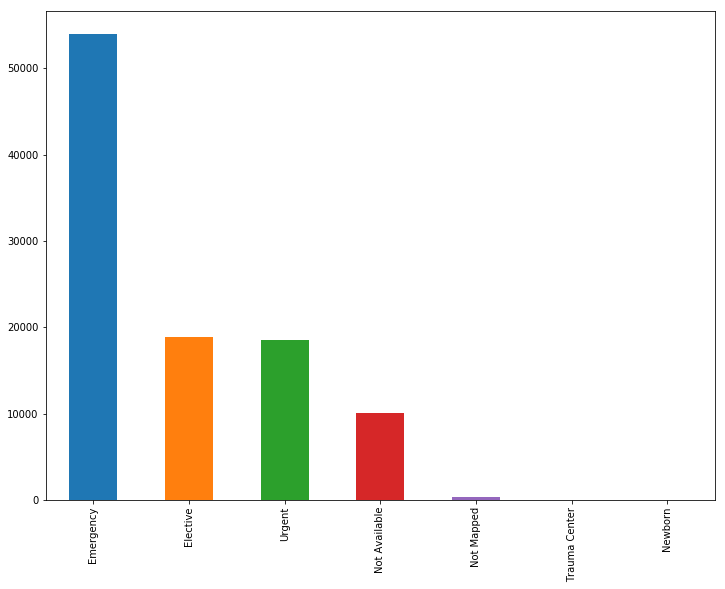

In [192]:
pd.value_counts(new_data['admission_type']).plot.bar(figsize = (12,9))

In [394]:
new_data['admission_type'] = new_data['admission_type'].fillna(random.choice(new_data['admission_type']))

In [395]:
new_data.isna().any()

encounter_id                False
patient_nbr                 False
race                        False
gender                      False
age                         False
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
payer_code                   True
medical_specialty           False
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                      False
diag_2                      False
diag_3                      False
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide               False
glipizide     

In [393]:
new_data['discharge_disposition'] = new_data['discharge_disposition'].fillna("No")

In [397]:
for i in range(len(new_data['admission_source'])):
    if new_data['admission_source'][i] is np.nan:
        new_data['admission_source'][i] = random.choice(new_data['admission_source'])

C:\Users\Leo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
data.groupby(['goal', 'time_in_hospital']).count()

encounter_id  patient_nbr   race  gender    age  \
goal time_in_hospital                                                    
0    1                        13046        13046  12736   13046  13046   
     2                        15512        15512  15156   15512  15512   
     3                        15862        15862  15475   15862  15862   
     4                        12280        12280  11999   12280  12280   
     5                         8767         8767   8579    8767   8767   
     6                         6590         6590   6435    6590   6590   
     7                         5107         5107   4985    5107   5107   
     8                         3766         3766   3681    3766   3766   
     9                         2590         2590   2534    2590   2590   
     10                        2006         2006   1958    2006   2006   
     11                        1660         1660   1624    1660   1660   
     12                        1255         1255   1234    1255   1255   
     13                        1061         1061   1042    1061   1061   
     14                         907          907    886     907    907   
1    1                         1162         1162   1142    1162   1162   
     2                         1712         1712   1685    1712   1712   
     3                         1894         1894   1867    1894   1894   
     4                         1644         1644   1606    1644   1644   
     5                         1199         1199   1184    1199   1199   
     6                          949          949    931     949    949   
     7                          752          752    735     752    752   
     8                          625          625    616     625    625   
     9                          412          412    406     412    412   
     10                         336          336    333     336    336   
     11                         195          195    192     195    195   
     12                         193          193    193     193    193   
     13                         149          149    147     149    149   
     14                         135          135    132     135    135   

                       weight  admission_type_id  discharge_disposition_id  \
goal time_in_hospital                                                        
0    1                    264              13046                     13046   
     2                    404              15512                     15512   
     3                    498              15862                     15862   
     4                    422              12280                     12280   
     5                    278               8767                      8767   
     6                    289               6590                      6590   
     7                    189               5107                      5107   
     8                    152               3766                      3766   
     9                    103               2590                      2590   
     10                    66               2006                      2006   
     11                    57               1660                      1660   
     12                    46               1255                      1255   
     13                    42               1061                      1061   
     14                    30                907                       907   
1    1                     25               1162                      1162   
     2                     72               1712                      1712   
     3                     62               1894                      1894   
     4                     40               1644                      1644   
     5                     41               1199                      1199   
     6                     28                949                       949   
     7                     27                752                       752   
     8  

In [19]:
data['goal']

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        1
12        1
13        0
14        0
15        0
16        1
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
101736    0
101737    0
101738    0
101739    0
101740    0
101741    0
101742    0
101743    0
101744    0
101745    0
101746    1
101747    0
101748    0
101749    0
101750    1
101751    0
101752    0
101753    0
101754    0
101755    0
101756    0
101757    0
101758    0
101759    0
101760    0
101761    0
101762    0
101763    0
101764    0
101765    0
Name: goal, Length: 101766, dtype: int64

In [20]:
data['time_in_hospital'].value_counts()

3     17756
2     17224
1     14208
4     13924
5      9966
6      7539
7      5859
8      4391
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: time_in_hospital, dtype: int64